# Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import re

In [2]:
req = requests.get('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names')
names = re.findall('(?:\d+:\s+)([^\n]*)(?:\n)', req.text)
names

['surgery?',
 'Age',
 'Hospital Number',
 'rectal temperature',
 'pulse',
 'respiratory rate',
 'temperature of extremities',
 'peripheral pulse',
 'mucous membranes',
 'capillary refill time',
 "pain - a subjective judgement of the horse's pain level",
 'peristalsis',
 'abdominal distension',
 'nasogastric tube',
 'nasogastric reflux',
 'nasogastric reflux PH',
 'rectal examination - feces',
 'abdomen',
 'packed cell volume',
 'total protein',
 'abdominocentesis appearance',
 'abdomcentesis total protein',
 'outcome',
 'surgical lesion?',
 'type of lesion',
 'cp_data']

In [3]:
names[10] = 'pain'
names.insert(-1, 'type of lesion 2')
names.insert(-1, 'type of lesion 3')
names

['surgery?',
 'Age',
 'Hospital Number',
 'rectal temperature',
 'pulse',
 'respiratory rate',
 'temperature of extremities',
 'peripheral pulse',
 'mucous membranes',
 'capillary refill time',
 'pain',
 'peristalsis',
 'abdominal distension',
 'nasogastric tube',
 'nasogastric reflux',
 'nasogastric reflux PH',
 'rectal examination - feces',
 'abdomen',
 'packed cell volume',
 'total protein',
 'abdominocentesis appearance',
 'abdomcentesis total protein',
 'outcome',
 'surgical lesion?',
 'type of lesion',
 'type of lesion 2',
 'type of lesion 3',
 'cp_data']

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv', names=names)
df.head()

,surgery?,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,type of lesion,type of lesion 2,type of lesion 3,cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [5]:
df = df[['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']]
df = df.replace('?', np.nan).astype('float')
df.head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1.0,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1.0,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1.0,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9.0,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1.0,37.3,104.0,35.0,NaN,NaN,2.0


# Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   Age                         300 non-null    float64
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(8)
memory usage: 18.9 KB


In [7]:
df.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


Столбцы `['surgery?', 'temperature of extremities', 'pain', 'outcome']` содержат качественные данные, по их значениям min и max можно заключить об отсутствии выбросов в этих столбцах.

В столбце с количественными данными `['rectal temperature']` также отсутствуют выбросы, значения находятся в разумном диапазоне от 35.4 до 40.8 градусов.

В столбце `['Age']` два уникальных значения 1 и 9, но согласно описанию должно быть две категории:
 - 1 = Adult horse
 - 2 = Young (< 6 months)

Как известно, у более молодых и соответственно меньших по размеру животных пульс и частота дыхания заметно выше, чем у старших особей. Сгруппировав таблицу по столбцу `['Age']` и посмотрев на средние и медианные значения столбцов `['pulse', 'respiratory rate']` делаем вывод, что за значением 9 скорее всего должна скрываться категория 2 = Young (< 6 months). Заменим эти значения в таблице.

In [8]:
df.groupby('Age')[['pulse', 'respiratory rate']].agg(['mean', 'median'])

pulse        respiratory rate       
           mean median             mean median
Age                                           
1.0   67.456693   60.0        28.238739   24.0
9.0  123.363636  124.0        54.600000   49.0

In [9]:
df.loc[df['Age'] == 9, 'Age'] = 2

df['Age'].value_counts()

1.0    276
2.0     24
Name: Age, dtype: int64

На наличие выбросов стоит проверить столбцы `['pulse', 'respiratory rate']` из-за большого размаха значений. На точечной диаграмме ниже видна высокая плотность показаний в значениях ближе к минимальным и их разрежение по мере увеличения значений. Максимальные значения столбцов `['pulse', 'respiratory rate']` находятся относительно недалеко от основной массы показаний, поэтому можно предположить, что это скорее не выбросы.

<AxesSubplot:xlabel='pulse', ylabel='respiratory rate'>

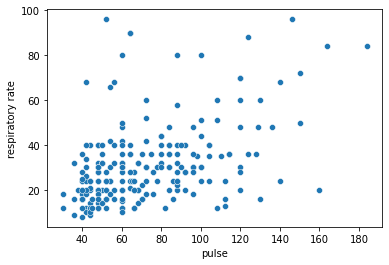

In [10]:
sns.scatterplot(x=df['pulse'], y=df['respiratory rate'])

# Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

Сохраним текущие статистики для их сравнения со статистиками, полученными после заполнения пропусков.

In [11]:
def q25(column):
    return column.quantile(0.25)

def q75(column):
    return column.quantile(0.75)

In [12]:
initial_stats = df.agg(['mean', 'std', q25, 'median', q75])
initial_stats

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
mean,1.397993,1.080000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,0.271746,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
q25,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
median,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
q75,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000


In [13]:
(df.isna().mean() * 100).round(2)

surgery?                       0.33
Age                            0.00
rectal temperature            20.00
pulse                          8.00
respiratory rate              19.33
temperature of extremities    18.67
pain                          18.33
outcome                        0.33
dtype: float64

### 3.1 surgery?, outcome
В столбцах `['surgery?', 'outcome']` по одному пропущенному значению в одной и той же строчке. Сравним какие были значения в этих столбцах у лошадей с идентичными значениями столбцов `['Age', 'temperature of extremities', 'pain']`.

In [14]:
df[df['surgery?'].isna()]

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
132,NaN,1.0,38.0,48.0,20.0,3.0,4.0,NaN


In [15]:
(
    df[
        (df['Age'] == 1) &
        (df['temperature of extremities'] == 3) &
        (df['pain'] == 4)
    ]
    .groupby(['surgery?', 'outcome'])[['Age']].count()
)

Age
surgery? outcome     
1.0      1.0        5
         2.0        3
         3.0        3
2.0      2.0        2
         3.0        5

По результатам группировки нельзя с достаточной уверенностью сказать какие могли бы быть значения столбцов `['surgery?', 'outcome']`. В то же время критически важной представляется информация о наличии операции и об исходе лечения лошади, и мы не можем просто оставить пропуски в этих столбцах. Принимаем решение удалить строку с пропусками в этих столбцах.

In [16]:
df = df.dropna(subset = ['surgery?'])

(df.isna().mean() * 100).round(2)

surgery?                       0.00
Age                            0.00
rectal temperature            20.07
pulse                          8.03
respiratory rate              19.40
temperature of extremities    18.73
pain                          18.39
outcome                        0.00
dtype: float64

### 3.2 pulse
В столбце `['pulse']` пропущено 8% значений. С помощью группировки посмотрим есть ли зависимость пульса от значений в столбцах `['Age', 'surgery?', 'outcome']`.

In [17]:
df.groupby(['Age', 'surgery?', 'outcome']).agg({'pulse': ['median', 'count']})

pulse      
                     median count
Age surgery? outcome             
1.0 1.0      1.0       60.0    82
             2.0       73.5    40
             3.0       79.0    26
    2.0      1.0       50.0    73
             2.0       90.0    16
             3.0       85.0    16
2.0 1.0      1.0      122.0     6
             2.0      146.0     9
             3.0      100.0     1
    2.0      1.0       90.0     5
             2.0       92.0     1

Исходя из существенной разницы медианных значениий пульса для каждой группы можно заключить, что определенная зависимость между этими параметрами все-таки есть. Заполним с помощью функции **pulse_filler** пустые ячейки столбца `['pulse']` медианными значениями в зависимости возраста, наличия операции и исхода лечения лошади.

In [18]:
def pulse_filler(row):
    
    filler = {'111': 60, '112': 73.5, '113': 79, '121': 50, '122': 90, '123': 85,
              '211': 122, '212': 146, '213': 100, '221': 90, '222': 92, '223': 91}
    
    if np.isnan(row['pulse']):

        for age in range(1, 3):
            for surgery in range(1, 3):
                for outcome in range(1, 4):

                    if (row['Age'] == age) and (row['surgery?'] == surgery) and (row['outcome'] == outcome):

                        return filler[str(age) + str(surgery) + str(outcome)]
    return row['pulse']

In [19]:
df['pulse'] = df.apply(pulse_filler, axis=1)

(df.isna().mean() * 100).round(2)

surgery?                       0.00
Age                            0.00
rectal temperature            20.07
pulse                          0.00
respiratory rate              19.40
temperature of extremities    18.73
pain                          18.39
outcome                        0.00
dtype: float64

### 3.3 rectal temperature, respiratory rate
В столбцах `['rectal temperature', 'respiratory rate']` пропущено около 20% значений. Заметнее всего эти показатели зависят от возраста, поэтому заполним пропуски медианными значениями в зависимости от возрастной группы лошади.

In [20]:
(
    df.groupby('Age')
    .agg({'rectal temperature': ['median', 'count'], 'respiratory rate': ['median', 'count']})
)

rectal temperature       respiratory rate      
                median count           median count
Age                                                
1.0               38.1   219             24.0   221
2.0               38.6    20             49.0    20

In [21]:
df.loc[(df['Age'] == 1) & (df['rectal temperature'].isna()), 'rectal temperature'] = 38.1
df.loc[(df['Age'] == 2) & (df['rectal temperature'].isna()), 'rectal temperature'] = 38.6

df.loc[(df['Age'] == 1) & (df['respiratory rate'].isna()), 'respiratory rate'] = 24
df.loc[(df['Age'] == 2) & (df['respiratory rate'].isna()), 'respiratory rate'] = 49

(df.isna().mean() * 100).round(2)

surgery?                       0.00
Age                            0.00
rectal temperature             0.00
pulse                          0.00
respiratory rate               0.00
temperature of extremities    18.73
pain                          18.39
outcome                        0.00
dtype: float64

### 3.4 temperature of extremities
В столбце `['temperature of extremities']` пропущено около 19% значений. Согласно сводной таблице, подсчитывающей частоту появления различных значений этого столбца у лошадей, сгруппированных по возрасту, наличию операции и исходу болезни, наиболее частым в каждой из групп значением будет 1 = Normal, либо 3 = Cool.

In [22]:
df.pivot_table(index=['Age', 'surgery?', 'outcome'], columns=['temperature of extremities'], aggfunc='size')

temperature of extremities   1.0   2.0   3.0  4.0
Age surgery? outcome                             
1.0 1.0      1.0            27.0   8.0  29.0  7.0
             2.0             8.0   2.0  22.0  7.0
             3.0             3.0   1.0   8.0  5.0
    2.0      1.0            32.0  17.0  16.0  4.0
             2.0             NaN   1.0  14.0  1.0
             3.0             1.0   NaN  12.0  2.0
2.0 1.0      1.0             3.0   NaN   1.0  NaN
             2.0             2.0   NaN   5.0  1.0
             3.0             NaN   NaN   1.0  NaN
    2.0      1.0             1.0   1.0   NaN  NaN
             2.0             1.0   NaN   NaN  NaN

Заполним с помощью функции **xtreme_t_filler** пустые ячейки столбца `['temperature of extremities']` наиболее частыми значениями в зависимости возраста, наличия операции и исхода лечения лошади.

In [23]:
def xtreme_t_filler(row):
    
    filler = {'111': 3, '112': 3, '113': 3, '121': 1, '122': 3, '123': 3,
               '211': 1, '212': 3, '213': 1, '221': 1, '222': 1, '223': 1}
    
    if np.isnan(row['temperature of extremities']):

        for age in range(1, 3):
            for surgery in range(1, 3):
                for outcome in range(1, 4):

                    if (row['Age'] == age) and (row['surgery?'] == surgery) and (row['outcome'] == outcome):

                        return filler[str(age) + str(surgery) + str(outcome)]
    return row['temperature of extremities']

In [24]:
df['temperature of extremities'] = df.apply(xtreme_t_filler, axis=1)

(df.isna().mean() * 100).round(2)

surgery?                       0.00
Age                            0.00
rectal temperature             0.00
pulse                          0.00
respiratory rate               0.00
temperature of extremities     0.00
pain                          18.39
outcome                        0.00
dtype: float64

### 3.5 pain
В столбце `['pain']` пропущено около 18% значений. Аналогично предыдущему пункту поступим с этим столбцом, заполнив пустые ячейки с помощью функции **pain_filler** наиболее частыми значениями в зависимости наличия операции и исхода лечения лошади.

In [25]:
df.pivot_table(index=['surgery?', 'outcome'], columns=['pain'], aggfunc='size')

pain               1.0   2.0   3.0   4.0   5.0
surgery? outcome                              
1.0      1.0       9.0  15.0  33.0   8.0  10.0
         2.0       NaN  11.0   5.0  15.0  17.0
         3.0       NaN   8.0   1.0   5.0   6.0
2.0      1.0      26.0  18.0  21.0   2.0   2.0
         2.0       2.0   3.0   3.0   2.0   7.0
         3.0       1.0   4.0   4.0   6.0   NaN

In [26]:
def pain_filler(row):
    
    filler = {'11': 3, '12': 5, '13': 2, '21': 1, '22': 5, '23': 4}
    
    if np.isnan(row['pain']):

        for surgery in range(1, 3):
            for outcome in range(1, 4):

                if (row['surgery?'] == surgery) and (row['outcome'] == outcome):

                    return filler[str(surgery) + str(outcome)]
    return row['pain']

In [27]:
df['pain'] = df.apply(pain_filler, axis=1)

(df.isna().mean() * 100).round(2)

surgery?                      0.0
Age                           0.0
rectal temperature            0.0
pulse                         0.0
respiratory rate              0.0
temperature of extremities    0.0
pain                          0.0
outcome                       0.0
dtype: float64

# Сравнение статистик

In [28]:
new_stats = df.agg(['mean', 'std', q25, 'median', q75])
new_stats

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
mean,1.397993,1.080268,38.161538,72.010033,29.541806,2.367893,2.926421,1.551839
std,0.490305,0.272162,0.658266,28.197587,16.207363,1.019165,1.331575,0.737187
q25,1.000000,1.000000,37.900000,48.500000,20.000000,1.000000,2.000000,1.000000
median,1.000000,1.000000,38.100000,64.000000,24.000000,3.000000,3.000000,1.000000
q75,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.000000,2.000000


In [29]:
new_stats / initial_stats

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
mean,1.0,1.000248,0.999833,1.001349,0.971215,1.008317,0.991664,1.0
std,1.0,1.001531,0.898916,0.984877,0.918669,0.975227,1.018071,1.0
q25,1.0,1.000000,1.002646,1.010417,1.081081,1.000000,1.000000,1.0
median,1.0,1.000000,0.997382,1.000000,0.979592,1.000000,1.000000,1.0
q75,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


### Вывод
Исходя из сравнения базовых статистик можно заключить, что заполнение пропусков выполнено с достаточной степенью точности. Подавляющее большинство показателей изменилось менее, чем на 3%. Исключение составляют следующие значения:
 - `['rectal temperature']` Стандартное отклонение: -10%
 - `['respiratory rate']` Стандартное отклонение: -8%
 - `['respiratory rate']` 25 квантиль: +8%

Делаем вывод, что для этих двух столбцов можно найти более подходящий метод заполнения пропусков.